In [1]:
# Data processing  
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Pandas options  
# -----------------------------------------------------------------------
pd.options.display.max_colwidth = None

# Path configuration for custom module imports
# -----------------------------------------------------------------------
import sys
sys.path.append('../')

# Ignore warnings  
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Clusters and metrics
# -----------------------------------------------------------------------
from yellowbrick.cluster import KElbowVisualizer

# Clustering models
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Custom functions and classes
# -----------------------------------------------------------------------
from src.support_preprocess import preprocess
from src.support_eda import plot_relation_tv
from src.support_clustering import *

# Data loading and preprocess

In [3]:
df = pd.read_csv('../data/processed/products.csv', index_col=0)

df.head()

,Category,Sub-Category,NumberOfCustomers,TotalSales,TotalQuantity,TotalProfit,TotalShippingCost
ProductID,,,,,,,
FUR-ADV-10000002,Furniture,Furnishings,2,159.120,3,60.390,10.14
FUR-ADV-10000108,Furniture,Furnishings,3,350.070,7,3.360,22.90
FUR-ADV-10000183,Furniture,Furnishings,8,974.832,31,-651.738,100.02
FUR-ADV-10000188,Furniture,Furnishings,5,124.950,7,4.200,16.53
FUR-ADV-10000190,Furniture,Furnishings,1,222.360,2,104.460,32.71


### Let’s carry out the preprocessing

* Remove the columns we do not want to consider.

    - In this case, we are not going to remove any columns.

* Select the encoding methods for categorical variables.

    - We only have the categorical variables `Category` and `Sub-Category`, which consists of just three categories. We will perform a Frequency Encoding.

* Select the scaling method.

    - We will initially try using a RobustScaler due to the significant presence of outliers.

In [9]:
cols = []

encoding_methods = {"frequency": ['Category', 'Sub-Category']}

scaling = 'robust'

df_encoded, df_scaled = preprocess(df, encoding_methods, scaling, columns_drop=cols)

In [10]:
df_encoded.head()

,Category,Sub-Category,NumberOfCustomers,TotalSales,TotalQuantity,TotalProfit,TotalShippingCost
ProductID,,,,,,,
FUR-ADV-10000002,0.216479,0.066459,2,159.120,3,60.390,10.14
FUR-ADV-10000108,0.216479,0.066459,3,350.070,7,3.360,22.90
FUR-ADV-10000183,0.216479,0.066459,8,974.832,31,-651.738,100.02
FUR-ADV-10000188,0.216479,0.066459,5,124.950,7,4.200,16.53
FUR-ADV-10000190,0.216479,0.066459,1,222.360,2,104.460,32.71


In [11]:
df_scaled.head()

,Category,Sub-Category,NumberOfCustomers,TotalSales,TotalQuantity,TotalProfit,TotalShippingCost
ProductID,,,,,,,
FUR-ADV-10000002,-1.044357,0.52,-0.4,-0.251171,-0.705882,0.134199,-0.298725
FUR-ADV-10000108,-1.044357,0.52,-0.2,-0.091262,-0.470588,-0.203325,-0.196204
FUR-ADV-10000183,-1.044357,0.52,0.8,0.431936,0.941176,-4.080435,0.423421
FUR-ADV-10000188,-1.044357,0.52,0.2,-0.279786,-0.470588,-0.198354,-0.247384
FUR-ADV-10000190,-1.044357,0.52,-0.6,-0.198211,-0.764706,0.395021,-0.117385


# Clustering

Vamos a llevar a cabo diferentes algoritmos de clustering para ver cómo se segmentan los clientes.

## K-means

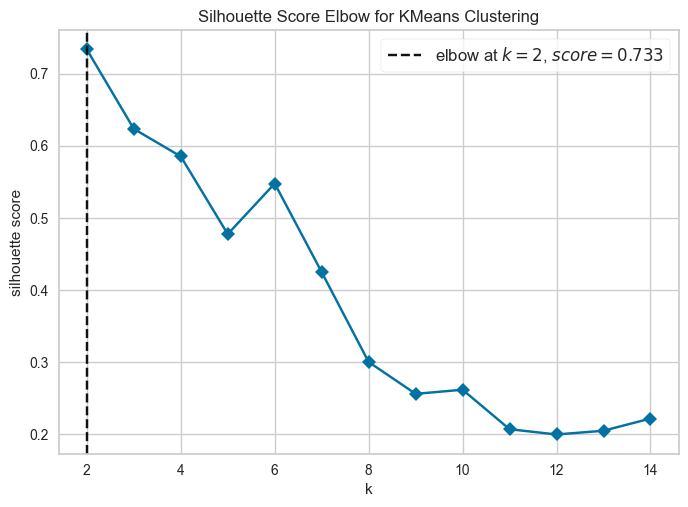

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [12]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=False)
visualizer.fit(df_scaled)
visualizer.show()